In [20]:
import sys
import datetime as dt
import MOD_Load_MasterDictionary_v2022 as md
import MOD_Read_DocDict as rd
import os
import pickle
import concurrent.futures
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
IN_MASTER = r'/data/workspace_files/Loughran-McDonald_MasterDictionary_1993-2021.csv'

In [22]:
lm_dict = pd.read_csv(IN_MASTER)

In [23]:
len(lm_dict)

86531

In [24]:
positive = lm_dict[lm_dict['Positive']>0]
negative = lm_dict[lm_dict['Negative']>0]

In [25]:
uncertain = lm_dict[lm_dict['Uncertainty']>0]
litguous = lm_dict[lm_dict['Litigious']>0]

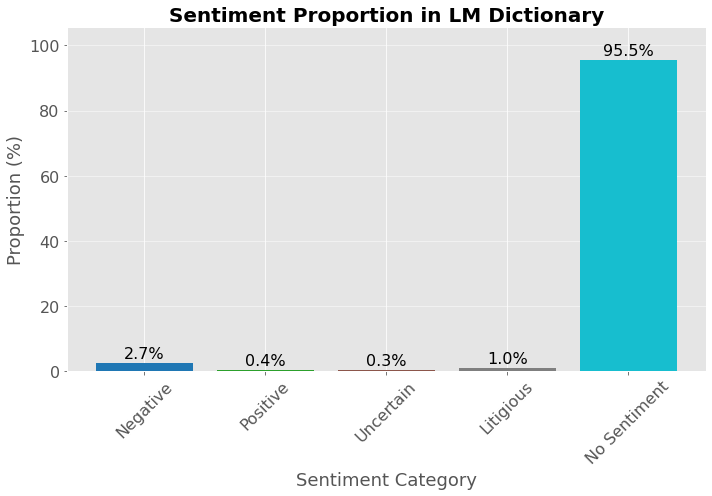

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate proportions
total = len(lm_dict)
neg_prop = len(negative) * 100 / total
pos_prop = len(positive) * 100 / total
uncertain_prop = len(uncertain) * 100 / total
litigious_prop = len(litguous) * 100 / total

# Calculate the proportion of remaining (no sentiment)
remaining_prop = 100 - (neg_prop + pos_prop + uncertain_prop + litigious_prop)

# # Labels for the categories
# labels = ['Negative', 'Positive', 'Uncertain', 'Litigious', 'No Sentiment']

# # Proportions for the categories
# proportions = [neg_prop, pos_prop, uncertain_prop, litigious_prop, remaining_prop]


# # Plotting the bar chart
# plt.figure(figsize=(8, 6))
# bars = plt.bar(labels, proportions, color=['red', 'green', 'orange', 'blue', 'gray'])
# plt.title('Sentiment Proportion in LM Dictionary')
# plt.xlabel('Sentiment Category')
# plt.ylabel('Proportion (%)')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Annotate percentages on top of each bar
# for bar, proportion in zip(bars, proportions):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{proportion:.1f}%', ha='center', va='bottom')

# plt.tight_layout()
# plt.show()


# Labels for the categories
labels = ['Negative', 'Positive', 'Uncertain', 'Litigious', 'No Sentiment']

# # Set a sophisticated style
# plt.style.use('ggplot')

# # Create a color palette
# colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))

# # Create figure and plot space
# plt.figure(figsize=(10, 7))

# # Plotting the bar chart with a custom color palette
# bars = plt.bar(labels, proportions, color=colors)

# # Adding title and labels with improved font settings
# plt.title('Sentiment Proportion in LM Dictionary', fontsize=16, fontweight='bold')
# plt.xlabel('Sentiment Category', fontsize=14)
# plt.ylabel('Proportion (%)', fontsize=14)

# # Customize x-ticks
# plt.xticks(rotation=45, fontsize=12)

# # Customizing the grid
# plt.grid(axis='y', linestyle='-', linewidth=0.7, alpha=0.7)

# # Annotating percentages on top of each bar
# for bar, proportion in zip(bars, proportions):
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{proportion:.1f}%', ha='center', va='bottom', fontsize=12)

# # Adjust the ylim to give space for text
# plt.ylim(0, max(proportions) + 10)

# # Apply tight layout to adjust subplot params and prevent clipping of tick-labels
# plt.tight_layout()

# # Show the plot
# plt.show()


# Labels for the categories
labels = ['Negative', 'Positive', 'Uncertain', 'Litigious', 'No Sentiment']

# Set a sophisticated style
plt.style.use('ggplot')

# Create a color palette using the 'tab10' colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))

# Create figure and plot space
plt.figure(figsize=(10, 7))

# Plotting the bar chart with the 'tab10' color palette
bars = plt.bar(labels, proportions, color=colors)

# Adding title and labels with increased font settings
plt.title('Sentiment Proportion in LM Dictionary', fontsize=20, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=18)
plt.ylabel('Proportion (%)', fontsize=18)

# Customize x-ticks and y-ticks with increased font size
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Customizing the grid
plt.grid(axis='y', linestyle='-', linewidth=0.7, alpha=0.7)

# Increase tick size
plt.tick_params(axis='both', which='major', labelsize=16)

# Annotating percentages on top of each bar
for bar, proportion in zip(bars, proportions):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{proportion:.1f}%', ha='center', va='bottom', fontsize=16)

# Adjust the ylim to give space for text
plt.ylim(0, max(proportions) + 10)

# Apply tight layout to adjust subplot params and prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, proportions, color=['red', 'green', 'orange', 'blue', 'gray'])
plt.title('Sentiment Proportion in LM Dictionary')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentages on top of each bar
for bar, proportion in zip(bars, proportions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{proportion:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
summary = pd.read_csv('/data/workspace_files/Loughran-McDonald_10X_Summaries_1993-2021.csv')

In [9]:
len(summary)

1140486

In [10]:
summary = pd.read_csv('/data/workspace_files/Loughran-McDonald_10X_Summaries_1993-2021.csv')
summary = summary[summary['FORM_TYPE'].isin([ '10-K', '10-Q', '10-K405', '10-KSB'])]
summary = summary[summary['CPR']!=-99]
summary['FILING_DATE'] = pd.to_datetime(summary['FILING_DATE'], format='%Y%m%d', errors='ignore')
summary['CPR'] = pd.to_datetime(summary['CPR'], format='%Y%m%d', errors='ignore')
summary = summary.dropna(subset=['CIK', 'FILING_DATE', 'CPR', 'N_Words'])
summary = summary[summary['N_Words']>100]
summary['sentiment_score'] = (summary['N_Positive']-summary['N_Negative']-summary['N_Litigious'])/summary['N_Words']

In [11]:
summary['sentiment_score'] = (summary['N_Positive']-summary['N_Negative']-summary['N_Litigious'])/summary['N_Words']

In [12]:
summary['year'] = summary['CPR'].dt.year

In [13]:
year_filings = summary.groupby('year').agg({'CIK': 'nunique'})

In [14]:
year_filings = year_filings[year_filings.index>1990]

<Figure size 720x432 with 0 Axes>

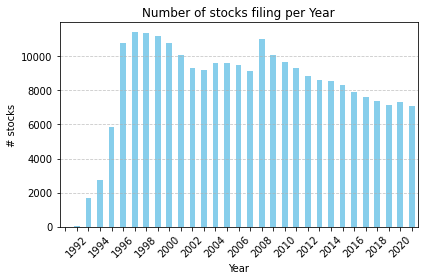

In [15]:
# Plotting the bar chart with skipped x-axis labels
plt.figure(figsize=(10, 6))
ax = year_filings.plot(kind='bar', color='skyblue', legend=None)
plt.title('Number of stocks filing per Year')
plt.xlabel('Year')
plt.ylabel('# stocks')

# Skip every 2nd label (adjust the interval as needed)
plt.xticks(range(len(year_filings.index)), year_filings.index, rotation=45)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)  # Set every 2nd label to be invisible

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
year_sentiment = summary.groupby('year').agg({'sentiment_score': 'mean'})
year_sentiment = year_sentiment[year_sentiment.index>1990]

<Figure size 720x432 with 0 Axes>

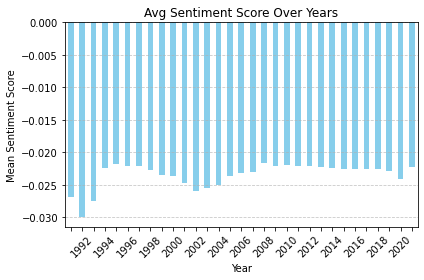

In [17]:
# Plotting the bar chart with skipped x-axis labels
plt.figure(figsize=(10, 6))
ax = year_sentiment.plot(kind='bar', color='skyblue', legend=None)
plt.title('Avg Sentiment Score Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')

# Skip every 2nd label (adjust the interval as needed)
plt.xticks(range(len(year_sentiment.index)), year_sentiment.index, rotation=45)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)  # Set every 2nd label to be invisible

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
summary.head()

,CIK,FILING_DATE,ACC_NUM,CPR,FORM_TYPE,CoName,SIC,FFInd,N_Words,N_Unique_Words,...,N_Negation,GrossFileSize,NetFileSize,NonTextDocTypeChars,HTMLChars,XBRLChars,XMLChars,N_Exhibits,sentiment_score,year
0,60512,1993-08-13,0000060512-94-000005,1993-06-30,10-Q,LOUISIANA LAND & EXPLORATION CO,1311,30,4068,770,...,1,63255,43072,0,464,0,0,0,-0.033677,1993
1,66740,1993-08-13,0000066740-94-000015,1993-06-30,10-Q,MINNESOTA MINING & MANUFACTURING CO,2670,38,4389,844,...,3,57283,37946,0,392,0,0,3,-0.012303,1993
3,60512,1993-11-10,0000060512-94-000007,1993-09-30,10-Q,LOUISIANA LAND & EXPLORATION CO,1311,30,4938,812,...,1,72062,50742,0,505,0,0,0,-0.031389,1993
4,11860,1993-11-12,0000011860-94-000005,1993-09-30,10-Q,BETHLEHEM STEEL CORP /DE/,3312,19,3823,898,...,2,40392,32088,0,201,0,0,0,-0.027465,1993
5,20762,1993-11-12,0000950131-94-000025,1993-09-30,10-Q,CLARK REFINING & MARKETING INC,2911,30,4136,885,...,3,51625,37594,0,500,0,0,0,-0.022485,1993


In [19]:
summary[summary['CIK']==1318605]

,CIK,FILING_DATE,ACC_NUM,CPR,FORM_TYPE,CoName,SIC,FFInd,N_Words,N_Unique_Words,...,N_Negation,GrossFileSize,NetFileSize,NonTextDocTypeChars,HTMLChars,XBRLChars,XMLChars,N_Exhibits,sentiment_score,year
777995,1318605,2010-08-13,0001193125-10-188792,2010-06-30,10-Q,TESLA MOTORS INC,3711,23,59104,3223,...,37,1035047,423901,0,540878,0,0,3,-0.019423,2010
787278,1318605,2010-11-12,0001193125-10-259068,2010-09-30,10-Q,TESLA MOTORS INC,3711,23,73097,3688,...,56,2270335,531224,878788,754140,0,0,11,-0.026800,2010
796566,1318605,2011-03-03,0001193125-11-054847,2010-12-31,10-K,TESLA MOTORS INC,3711,23,91969,4148,...,47,1898041,670749,69161,1018973,0,0,6,-0.020289,2010
807458,1318605,2011-05-13,0001193125-11-139677,2011-03-31,10-Q,TESLA MOTORS INC,3711,23,43569,3037,...,23,735827,308045,0,376899,0,0,3,-0.023755,2011
816839,1318605,2011-08-12,0001193125-11-221497,2011-06-30,10-Q,TESLA MOTORS INC,3711,23,44367,3122,...,18,2378620,317107,401986,749205,366886,440209,9,-0.024275,2011
828044,1318605,2011-11-14,0001193125-11-308489,2011-09-30,10-Q,TESLA MOTORS INC,3711,23,65503,3884,...,52,2766941,475897,432660,918708,398151,416258,9,-0.035418,2011
835227,1318605,2012-02-27,0001193125-12-081990,2011-12-31,10-K,TESLA MOTORS INC,3711,23,90957,4255,...,42,5854878,668700,1158846,2115872,792727,822702,13,-0.023725,2011
845651,1318605,2012-05-10,0001193125-12-225825,2012-03-31,10-Q,TESLA MOTORS INC,3711,23,42414,3102,...,21,4878020,302385,1006888,1185294,1152000,1075599,10,-0.024497,2012
852232,1318605,2012-08-02,0001193125-12-332138,2012-06-30,10-Q,TESLA MOTORS INC,3711,23,54863,3384,...,27,5328496,388785,1015152,1287556,1430748,1024247,12,-0.025245,2012
863391,1318605,2012-11-07,0001193125-12-457610,2012-09-30,10-Q,TESLA MOTORS INC,3711,23,40084,2980,...,17,5233994,289939,1018538,1214104,1499592,1038377,9,-0.024548,2012
